In [187]:
import pandas as pd
import matplotlib.pyplot as plt
from isochrones import get_ichrone
import numpy as np
%config InlineBackend.figure_format = "retina"
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["font.size"] = 30
plt.rc('font',family='Times New Roman',size=20)
scatter_kwargs = {"zorder":50}


In [7]:
coef =  np.array([
        [1.7763, 1.4335e-4, 3.3954e-9, -7.6364e-12, -1.1950e-15], #re_venus
        [1.0385, 1.2456e-4, 1.4612e-8, -7.6345e-12, -1.7511e-15], #ru_green
        [1.0146, 8.1884e-5, 1.9394e-9, -4.3618e-12, -6.8260e-16], #mo_green
        [0,0,0,0,0], #maximum_greenhouse
        [0.3207, 5.4471e-5, 1.5275e-9, -2.1709e-12, -3.8282e-16]] #ear_mars
        )
hz_coef = pd.DataFrame(coef.T,columns = [
                        'recent_venus','runaway_greenhouse','moist_greenhouse',
                        'maximum_greenhouse','early_mars'])

In [87]:

def cal_hz(teff,L,inner = 'recent_venus', outer = 'early_mars'):
    t0 = teff - 5780
    t = np.array([1,t0,t0**2,t0**3,t0**4])
    return np.sqrt(L/(t*hz_coef[inner].values).sum()), np.sqrt(L/(t*hz_coef[outer].values).sum())


In [16]:
cal_hz(teff=5780,L=1)

(0.7503119132218752, 1.765836624230467)

In [257]:
data0[m][['ra','dec']]

ra     float64
dec    float64
dtype: object

In [258]:
data0[m][['ra','dec']].to_csv('tic.csv',index=False,sep='\t',header=None)

In [252]:
data0[m][['GAIA']].dropna().astype('int').to_csv('tic_gaia.csv',index=False,header=None)

In [245]:
tmp = pd.read_csv('asu(2).tsv',skiprows=137,sep='\t')
tmp

,----------------------------------------,------,----------,----------.1,--------,------.1,-------,-----,----------.2,---------,...,-----------.10,-----------.11,-----------.12,-----------.13,-----------.14,-----------.15,-----------.16,-----------.17,-----------.18,----.1
8.1226,67.2357,2552,8.122640,67.235669,10.065,0.022,12.188,3417.0,0.031,0.500,...,,,,,,,,,,Gaia
68.98015600000001,16.509301,21421,68.980161,16.509301,20.433,0.016,3.790,3826.0,452.745,48.494,...,,,475442.772,,,,,,,Gaia
79.172265,45.997991,24608,79.172329,45.997991,13.123,0.006,5.809,5307.0,135.979,13.813,...,,,,,,,,,,Gaia
47.3783830767708,45.73300788157471,14669,47.378306,45.732743,15.760,0.031,1.702,3991.0,0.046,0.448,...,,,,,,,,,,Gaia
36.941259,4.432104,11452,36.941092,4.432153,17.144,0.019,0.208,3928.0,0.210,0.992,...,572.500,,,,,,,,,Gaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79.8026101786547,-3.07339868685749,24819,79.802747,-3.073810,15.874,0.004,2.378,4253.0,0.322,1.046,...,,,,,,,,,,Gaia
105.95922376885099,-43.5615024133393,34052,105.959316,-43.561317,17.416,0.020,0.783,4362.0,0.150,0.680,...,,,,,,,,,,Gaia
153.034,-18.6178,49973,153.034030,-18.617799,17.182,0.029,0.434,3815.0,0.072,0.617,...,231.000,,,,,,,,,Gaia
233.053885954679,-41.2755920878719,76074,233.053882,-41.275586,5.926,0.003,1.159,3088.0,0.051,0.788,...,,,,,,,,,,Gaia


In [240]:
tic = pd.read_csv('TICv8_plx50.csv',skiprows=4)
data0 = tic[['GAIA','TWOMASS','ra','dec','plx','Vmag','Kmag','Teff','lum']]
m  = data0.Vmag < 12
m &= data0.Teff.isna()
data0[m][['ra','dec']].to_csv('tic.csv',index=False,sep='\t',header=None)
data0[m][['GAIA']].dropna().to_csv('tic_gaia.csv',index=False,header=None)


#m &= data0.GAIA.isna()
#ax = data0[m].plx.hist(bins=10,range=(0,100))
#plt.xlabel('Parallex')

In [166]:
tic = pd.read_csv('TICv8_plx50.csv',skiprows=4)
data = tic[['ra','dec','plx','Vmag','Kmag','Teff','lum']]
data.dropna(subset=['Vmag','Kmag','Teff','lum'],inplace=True)
data.reset_index(inplace=True,drop=True)

inner, outer= cal_hz(teff=data.Teff,L=data.lum)
plx = data.plx.values
data['hz_inner'] = inner/plx
data['hz_outer'] = outer/plx


data.sort_values('hz_inner',inplace=True)
data.reset_index(inplace=True,drop=True)
data = data[-500:]

/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/neptune/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

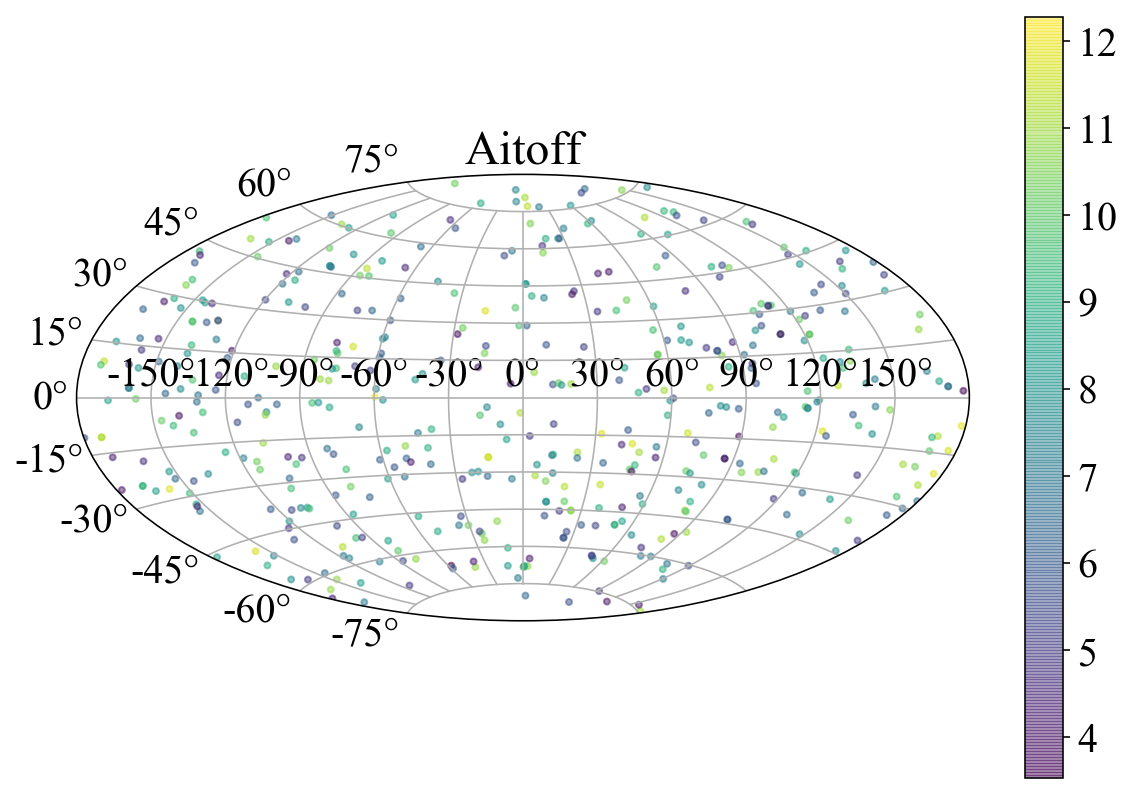

In [205]:
from astropy import units as u
from astropy.coordinates import SkyCoord

c = SkyCoord(ra=data.ra*u.degree, dec=data.dec*u.degree, frame='icrs')
ra_rad = c.ra.wrap_at(180 * u.deg).radian
dec_rad = c.dec.radian

plt.figure(figsize=(10,7))
plt.subplot(111, projection="aitoff")
plt.title("Aitoff")
plt.scatter(ra_rad, dec_rad,marker='.',alpha=0.5,c=data.Vmag)
plt.colorbar()
plt.grid(True)

(array([ 3., 26., 32., 56., 57., 80., 91., 64., 62., 29.]),
 array([1.933 , 2.4952, 3.0574, 3.6196, 4.1818, 4.744 , 5.3062, 5.8684,
        6.4306, 6.9928, 7.555 ]),
 <a list of 10 Patch objects>)

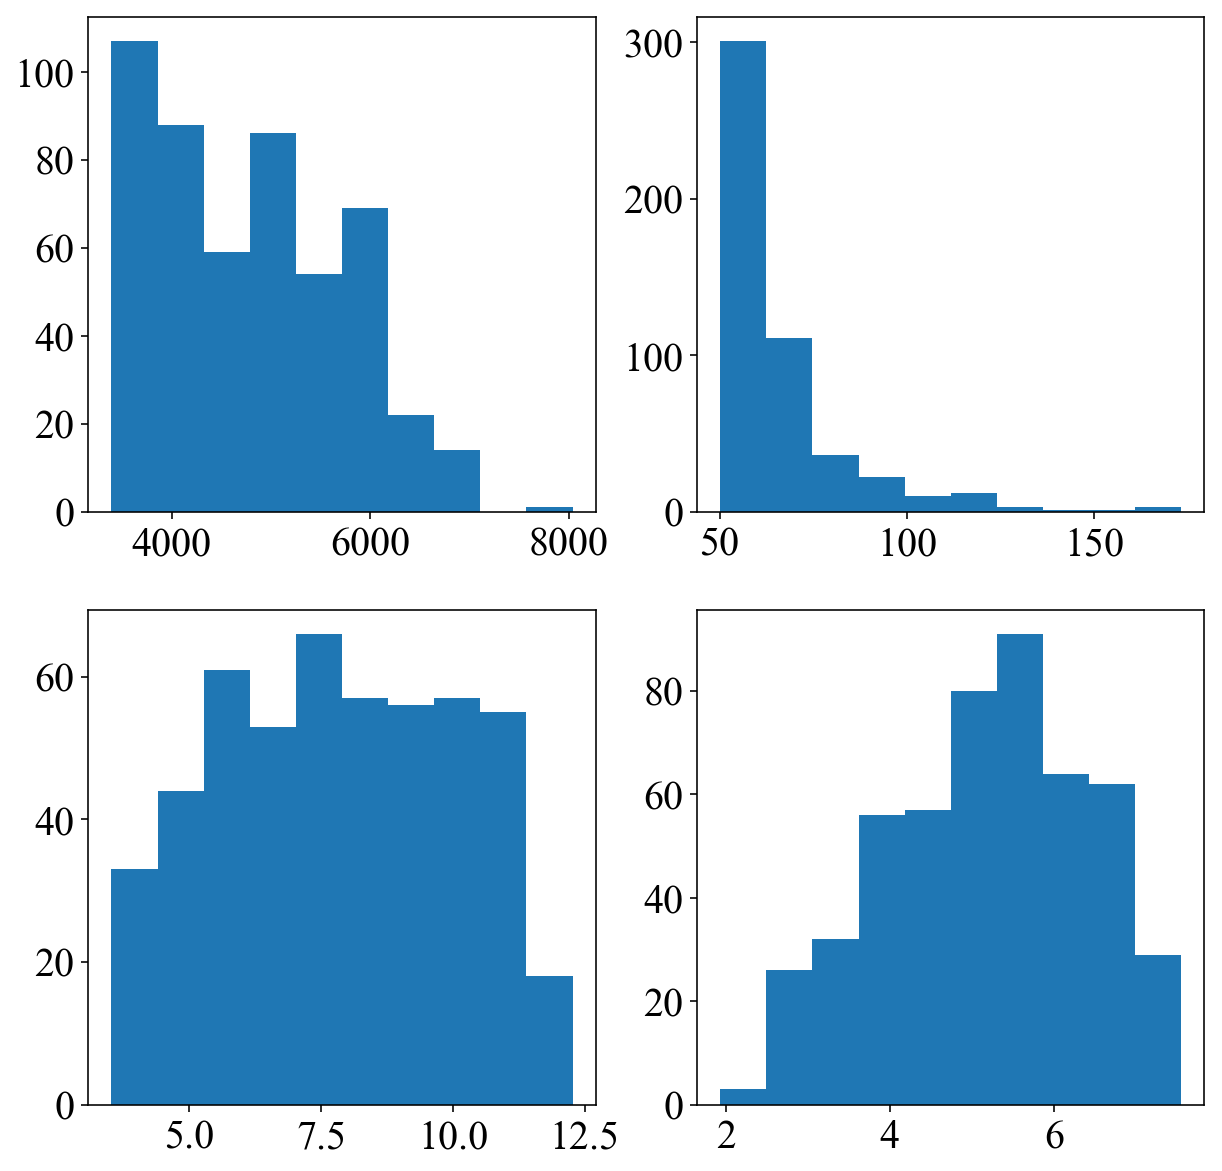

In [213]:
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
ax1,ax2,ax3,ax4 = axs.ravel()

ax1.hist(data.Teff)
ax2.hist(data.plx)
ax3.hist(data.Vmag)
ax4.hist(data.Kmag)

(array([107.,  88.,  59.,  86.,  54.,  69.,  22.,  14.,   0.,   1.]),
 array([3394.   , 3858.468, 4322.936, 4787.404, 5251.872, 5716.34 ,
        6180.808, 6645.276, 7109.744, 7574.212, 8038.68 ]),
 <a list of 10 Patch objects>)

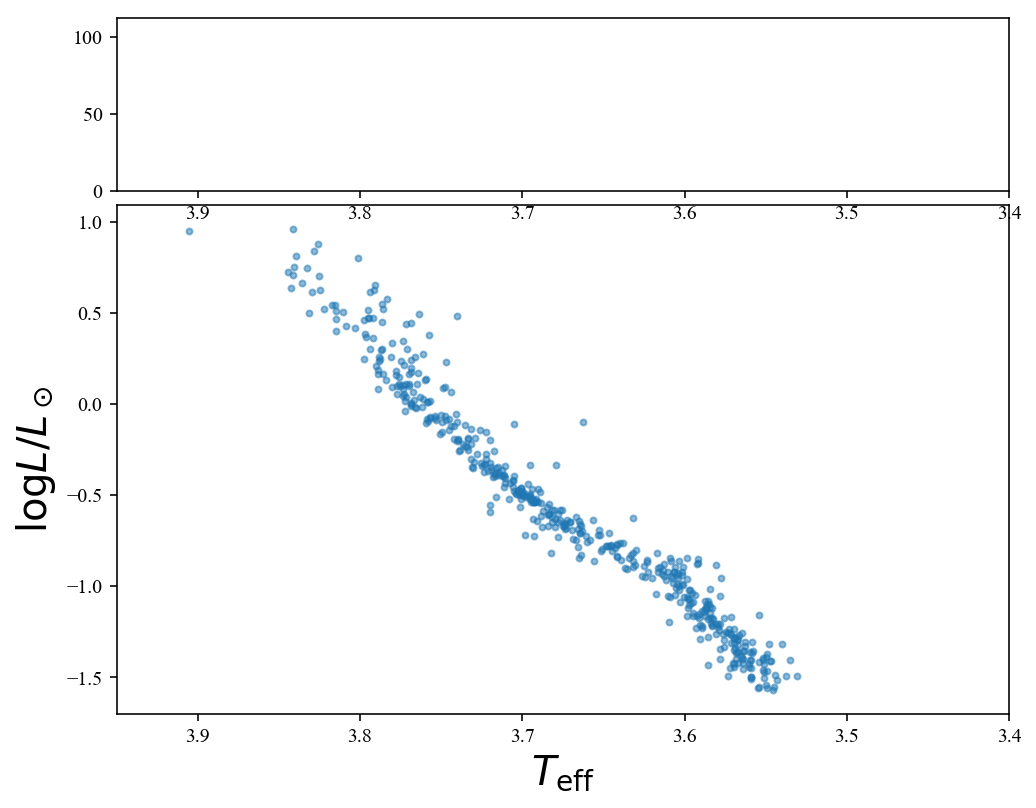

In [168]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(figsize=(8,6.4))

axs.scatter(np.log10(data.Teff),np.log10(data.lum),marker='.',alpha=0.5)
#axs.scatter(data.Teff,data.lum,marker='.',alpha=0.5)
axs.invert_xaxis()
axs.set_ylabel('$\log L/L_\odot$',fontsize=20)
axs.set_xlabel('$T_\mathrm{eff}$',fontsize=20)
axs.set_xlim([3.95,3.4])


divider = make_axes_locatable(axs)

axHistx = divider.append_axes("top", 1.2, pad=0.1, sharex=axs)
#plt.setp(axHistx.get_xticklabels() ,visible=False)

axHistx.hist(data.Teff)


#for tl in axHistx.get_xticklabels():
#   tl.set_visible(False)
#axHistx.set_yticks([0, 5, 10])

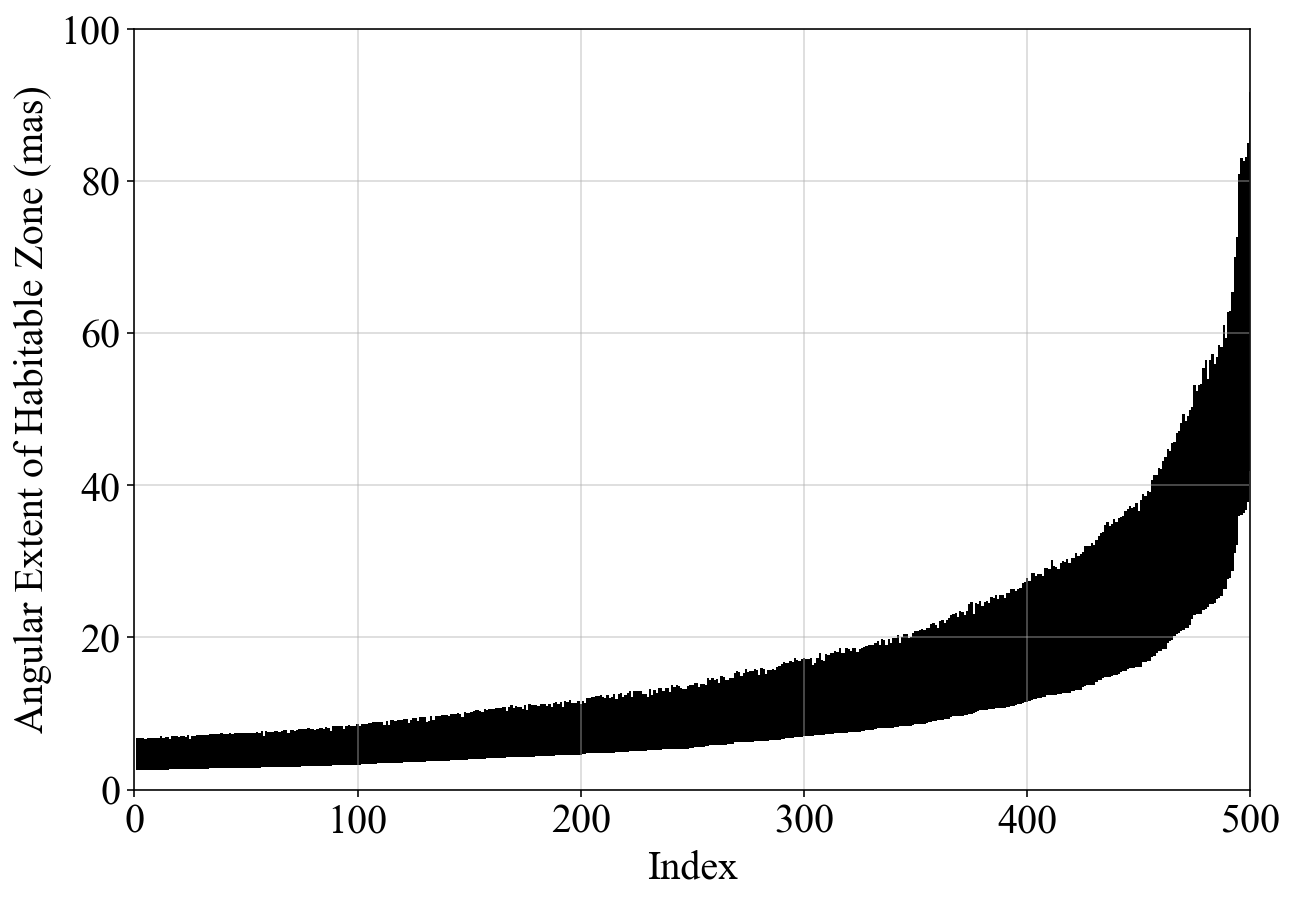

In [196]:
fig,axs = plt.subplots(figsize=(10,7))
axs.bar(x=np.arange(len(data))+1,
        width=1,
        bottom=data.hz_inner*1e3,
        height=(data.hz_outer-data.hz_inner)*1e3,
        color='black',
        alpha=1)
#axs.set_yscale('log')
axs.set_ylim([0,100])
axs.set_xlim([0,500])
axs.set_ylabel('Angular Extent of Habitable Zone (mas)')
axs.set_xlabel('Index')
axs.grid(True,alpha=0.5)

In [263]:
ra =data0[m].iloc[0].ra
dec = data0[m].iloc[0].dec

In [408]:
data0.iloc[0]

GAIA            3.86654e+17
TWOMASS    00054091+4548435
ra                  1.42092
dec                 45.8121
plx                 86.8735
Vmag                    8.2
Kmag                  5.262
Teff                   3959
lum               0.0850894
Name: 0, dtype: object

In [430]:
nan=data0[m].copy()

In [475]:
z = (nan.lum == 0)
nan.loc[z,'lum']=np.NaN
nan

,GAIA,TWOMASS,ra,dec,plx,Vmag,Kmag,Teff,lum
25,NaN,00322979+6714043,8.122600,67.235700,98.7400,10.270000,6.377,NaN,NaN
35,NaN,03480174+6840388,57.007270,68.677590,57.5300,9.410000,6.572,NaN,NaN
36,4.936507e+17,NaN,57.007051,68.677435,52.3391,11.276700,NaN,NaN,NaN
41,NaN,NaN,67.795490,58.977072,181.3600,10.820000,NaN,NaN,NaN
50,NaN,NaN,68.980156,16.509301,50.0900,0.872399,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5034,3.213959e+18,NaN,79.802610,-3.073399,57.9790,10.337900,NaN,NaN,NaN
5043,5.559267e+18,NaN,105.959224,-43.561502,57.7938,8.632900,NaN,NaN,NaN
5059,NaN,10120819-1837038,153.034000,-18.617800,58.5900,9.930000,6.194,NaN,NaN
5082,6.002807e+18,15321302-4116314,233.053886,-41.275592,169.0070,9.310000,4.759,NaN,NaN


In [463]:
nan=data0[m].copy()

np.isnan(nan.loc[25,'Teff'] )

True

In [535]:
v.TIMEOUT=120

In [467]:
dic = {'Teff': np.isnan(nan.loc[25,'Teff']),
       'Lum': np.isnan(nan.loc[25,'lum']),
       'Kmag': np.isnan(nan.loc[25,'Kmag']),
      }
dic.items()

dict_items([('Teff', True), ('Lum', False), ('Kmag', False)])

In [540]:
import astroquery

In [ ]:
pd

In [555]:
tmp = pd.read_csv('completed_teff_v1.csv',index_col=0)
#tmp = tmp[['Unnamed: 0','Kmag','Teff','lum']]
tmp

,GAIA,TWOMASS,ra,dec,plx,Vmag,Kmag,Teff,lum
25,NaN,00322979+6714043,8.122600,67.235700,98.7400,10.270000,6.377,3417.0,0.026798
35,NaN,03480174+6840388,57.007270,68.677590,57.5300,9.410000,6.572,3445.0,0.044480
36,4.936507e+17,NaN,57.007051,68.677435,52.3391,11.276700,6.572,3445.0,0.044480
41,NaN,NaN,67.795490,58.977072,181.3600,10.820000,5.720,3277.0,0.010313
50,NaN,NaN,68.980156,16.509301,50.0900,0.872399,NaN,4020.0,495.463000
...,...,...,...,...,...,...,...,...,...
5034,3.213959e+18,NaN,79.802610,-3.073399,57.9790,10.337900,5.050,4253.0,0.504546
5043,5.559267e+18,NaN,105.959224,-43.561502,57.7938,8.632900,5.704,4362.0,0.083920
5059,NaN,10120819-1837038,153.034000,-18.617800,58.5900,9.930000,6.194,3815.0,0.073172
5082,6.002807e+18,15321302-4116314,233.053886,-41.275592,169.0070,9.310000,4.759,3088.0,0.028315


In [566]:
m &= data0.Teff.isna()
data0[m].isna().sum()

GAIA        93
TWOMASS     89
ra           0
dec          0
plx          0
Vmag         0
Kmag        89
Teff       186
lum        113
dtype: int64

In [559]:
tic = pd.read_csv('TICv8_plx50.csv',skiprows=4)
data0 = tic[['GAIA','TWOMASS','ra','dec','plx','Vmag','Kmag','Teff','lum']]
m  = data0.Vmag < 12
data1 = data0[m].copy()

In [561]:
data1['Teff'].fillna(tmp['Teff'],inplace=True)

In [563]:
data1['Kmag'].fillna(tmp['Kmag'],inplace=True)
data1['lum'].fillna(tmp['lum'],inplace=True)
data1

,GAIA,TWOMASS,ra,dec,plx,Vmag,Kmag,Teff,lum
0,3.866539e+17,00054091+4548435,1.420925,45.812096,86.8735,8.2000,5.262,3959.00,0.085089
1,3.866537e+17,00054090+4548374,1.420845,45.810376,86.9402,8.2000,5.284,3947.00,0.081597
5,5.401366e+17,00232865+7711217,5.870114,77.189292,52.2518,11.3160,7.187,3626.00,0.035645
12,4.273224e+17,00530419+6107262,13.267483,61.123973,53.1896,4.7942,3.638,6114.22,3.577349
15,2.515037e+18,02122090+0334310,33.087448,3.575620,95.1619,10.0400,6.077,3671.00,0.032961
...,...,...,...,...,...,...,...,...,...
5244,6.855563e+18,NaN,310.524632,-21.277203,50.5276,9.2677,7.180,5189.00,NaN
5246,6.890353e+18,20564659-1026534,314.194154,-10.448541,62.1155,11.3800,6.884,3466.00,0.028366
5249,6.412595e+18,22032156-5647093,330.840220,-56.785981,274.8050,4.6900,2.237,4611.06,0.221826
5251,2.611164e+18,22501943-0705245,342.580934,-7.090106,68.9567,9.8600,6.104,3831.00,0.060467


In [567]:
data1.to_csv('tic_v12.csv')

In [542]:
readtime = {'timeout_value':120}
nan = data0[m].copy()
z = (nan.lum == 0)
nan.loc[z,'lum']=np.NaN
v = Vizier(columns=['_RAJ2000', '_DEJ2000','Teff','Lum','Kmag'])
v.TIMEOUT=180
for num,i in enumerate(nan.index):
    print('Starting searching for object {}.'.format(str(num)))
    ra = nan.loc[i,'ra']
    dec = nan.loc[i,'dec']
    dic = {'Teff': np.isnan(nan.loc[i,'Teff']),
           'Lum' : np.isnan(nan.loc[i,'lum']),
           'Kmag': np.isnan(nan.loc[i,'Kmag']),
      }
    
    
    
    
    result = v.query_region(coord.SkyCoord(ra=ra, dec=dec,
                                               unit=(u.deg, u.deg),
                                               frame='icrs'),radius=5*u.arcsec)
    
        
    for prop,t_f in dic.items():
        if t_f:
            print('Searching for {}.'.format(prop))
            for cat in result.keys():
                if (prop in result[cat].colnames):
                    if result[cat][prop].compressed().shape[0]>0:
                        if not isinstance(result[cat][prop].compressed()[0],str):
                            if result[cat][prop].compressed().max()>0:
                                nan.loc[i,prop] = result[cat][prop].compressed().max()
                    
                    
    print('Ending searching for object {}.'.format(str(num)))


Starting searching for object 0.
Searching for Teff.
Searching for Lum.
Ending searching for object 0.
Starting searching for object 1.
Searching for Teff.
Searching for Lum.
Ending searching for object 1.
Starting searching for object 2.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 2.
Starting searching for object 3.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 3.
Starting searching for object 4.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 4.
Starting searching for object 5.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 5.
Starting searching for object 6.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 6.
Starting searching for object 7.
Searching for Teff.
Searching for Lum.
Ending searching for object 7.
Starting searching for object 8.
Searching for Teff.
Searching for Lum.
Endi

Searching for Teff.
Searching for Lum.
Ending searching for object 72.
Starting searching for object 73.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 73.
Starting searching for object 74.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 74.
Starting searching for object 75.
Searching for Teff.
Searching for Lum.
Ending searching for object 75.
Starting searching for object 76.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 76.
Starting searching for object 77.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 77.
Starting searching for object 78.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 78.
Starting searching for object 79.
Searching for Teff.
Searching for Lum.
Ending searching for object 79.
Starting searching for object 80.
Searching for Teff.
Searching for Lum.
Ending searching for 

Searching for Teff.
Searching for Lum.
Ending searching for object 144.
Starting searching for object 145.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 145.
Starting searching for object 146.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 146.
Starting searching for object 147.
Searching for Teff.
Searching for Lum.
Ending searching for object 147.
Starting searching for object 148.
Searching for Teff.
Searching for Lum.
Ending searching for object 148.
Starting searching for object 149.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 149.
Starting searching for object 150.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 150.
Starting searching for object 151.
Searching for Teff.
Searching for Lum.
Searching for Kmag.
Ending searching for object 151.
Starting searching for object 152.
Searching for Teff.
Searching for Lum.
Endin

In [448]:
from astroquery.vizier import Vizier
import astropy.units as u
import astropy.coordinates as coord
v = Vizier(columns=['_RAJ2000', '_DEJ2000','Teff','Lum','Kmag'])
nan = data0[m]



result = v.query_region(coord.SkyCoord(ra=ra, dec=dec,
                                       unit=(u.deg, u.deg),
                                       frame='icrs'),radius=5*u.arcsec)